<a href="https://www.kaggle.com/code/itsnahm/eda-in-dataset-insurance?scriptVersionId=116754677" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv')

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [6]:
df.shape

(1340, 11)

**Data Preprocessing**
Since the amount of data is very small, let's drop rows where have missing values.

In [7]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum().sum()

0

In [10]:
df.shape

(1332, 11)

In [11]:
df.duplicated().sum()

0

**Exploratory Data Analysis**

In [12]:
df['index'].value_counts()

0       1
903     1
901     1
900     1
899     1
       ..
450     1
449     1
448     1
447     1
1339    1
Name: index, Length: 1332, dtype: int64

In [13]:
df['index'].nunique()

1332

In [14]:
df['PatientID'].value_counts()

1       1
904     1
902     1
901     1
900     1
       ..
451     1
450     1
449     1
448     1
1340    1
Name: PatientID, Length: 1332, dtype: int64

In [15]:
df['PatientID'].nunique()

1332

Delete 'index' and 'PatientID' columns because those columns have unique values as much as total amount of data row.

In [16]:
df = df.drop(['index','PatientID'], axis=1)

In [17]:
df.describe()

,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.086336,30.658333,94.189189,1.099850,13325.246426
std,11.112804,6.118967,11.445173,1.205958,12109.620712
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,47.000000,34.725000,99.000000,2.000000,16781.327500
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [18]:
numeric_columns = df.select_dtypes(exclude = ['object'])
numeric_columns

,age,bmi,bloodpressure,children,claim
0,39.0,23.2,91,0,1121.87
1,24.0,30.1,87,0,1131.51
7,19.0,41.1,100,0,1146.80
8,20.0,43.0,86,0,1149.40
9,30.0,53.1,97,0,1163.46
...,...,...,...,...,...
1335,44.0,35.5,88,0,55135.40
1336,59.0,38.1,120,1,58571.07
1337,30.0,34.5,91,3,60021.40
1338,37.0,30.4,106,0,62592.87


In [19]:
categoric_columns = df.select_dtypes(include = ['object'])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
7,male,No,No,northwest
8,male,No,No,northwest
9,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [20]:
for col in categoric_columns:
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True)
    percent100 = df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    x = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
    print(col)
    print(x)
    print('_'*40)

gender
        counts       per per100
male       670  0.503003  50.3%
female     662  0.496997  49.7%
________________________________________
diabetic
     counts       per per100
No      695  0.521772  52.2%
Yes     637  0.478228  47.8%
________________________________________
smoker
     counts       per per100
No     1058  0.794294  79.4%
Yes     274  0.205706  20.6%
________________________________________
region
           counts       per per100
southeast     442  0.331832  33.2%
northwest     345  0.259009  25.9%
southwest     314  0.235736  23.6%
northeast     231  0.173423  17.3%
________________________________________


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

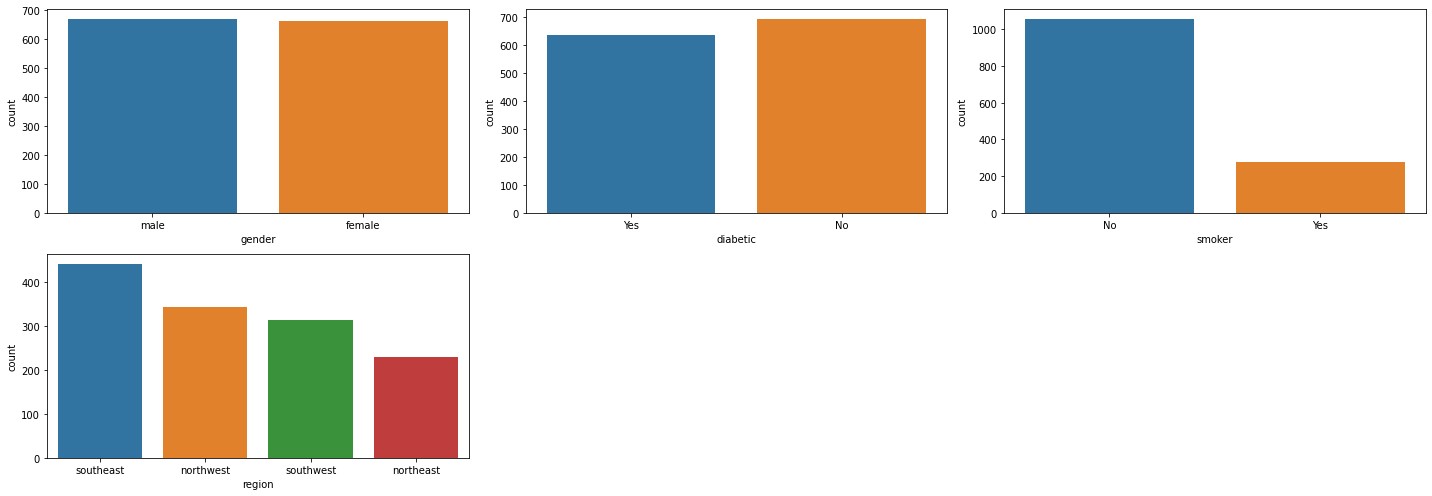

In [22]:
def countplot_categoric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in categoric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.countplot(data[col])
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

countplot_categoric(df)

**Conclusion about the total of claims:**
1. The gender who claim insurance is almost same between male and female. Male gender who claims insurance is 670 people (50.3%) and female gender who claims insurance is total 662 people (49.7%).
2. Difference of claim insurance who no have diabetic and suffer to diabetic disease is only 42 people. It means there is almost 50% of insurer who claims insurance have diabetic disease.
3. 79.4% people (1058 of 1339 people) who claims insurance is not smoker.
4. Southeast is the most people's region who claims insurance followed by Northwest, Southwest, and Northeast in a row.

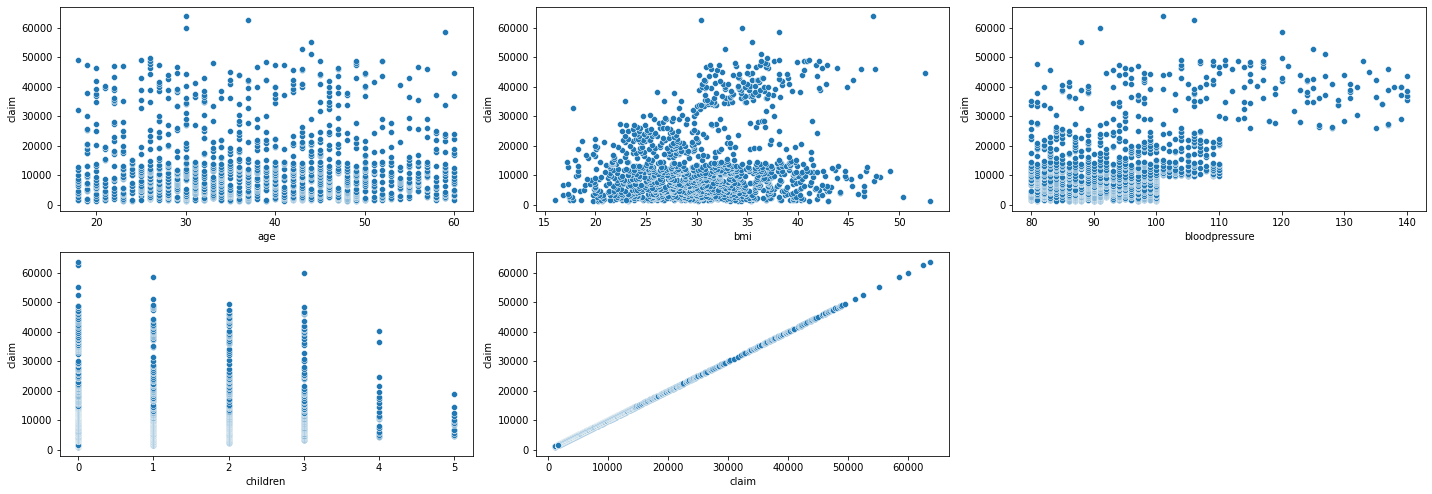

In [23]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

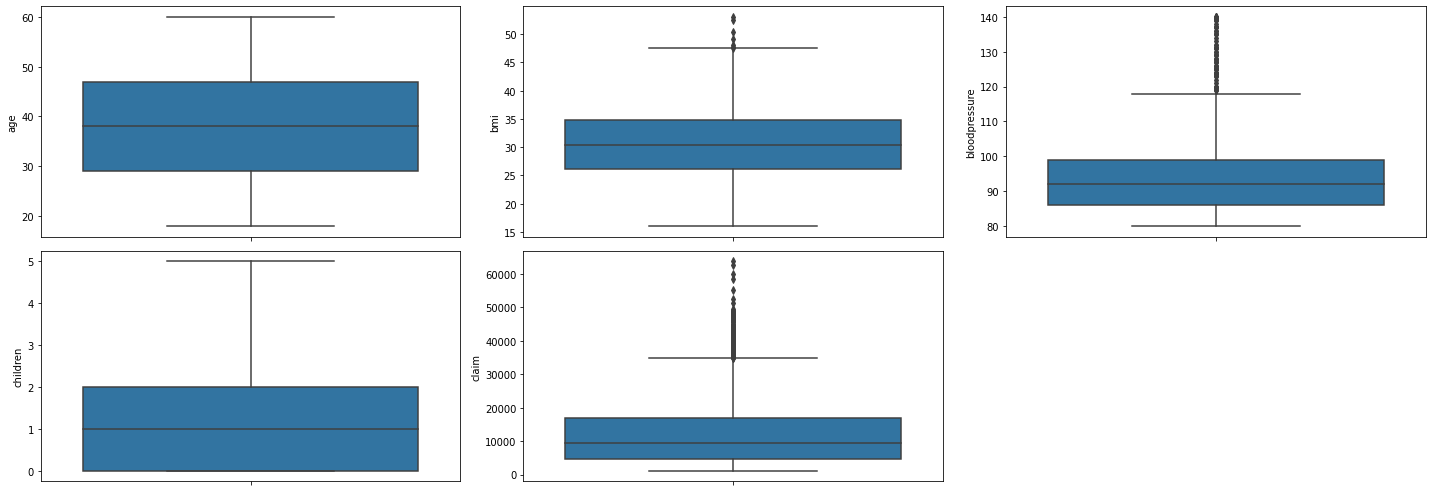

In [24]:
def box_plot(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.boxplot(y=col, data=data)
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

box_plot(df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

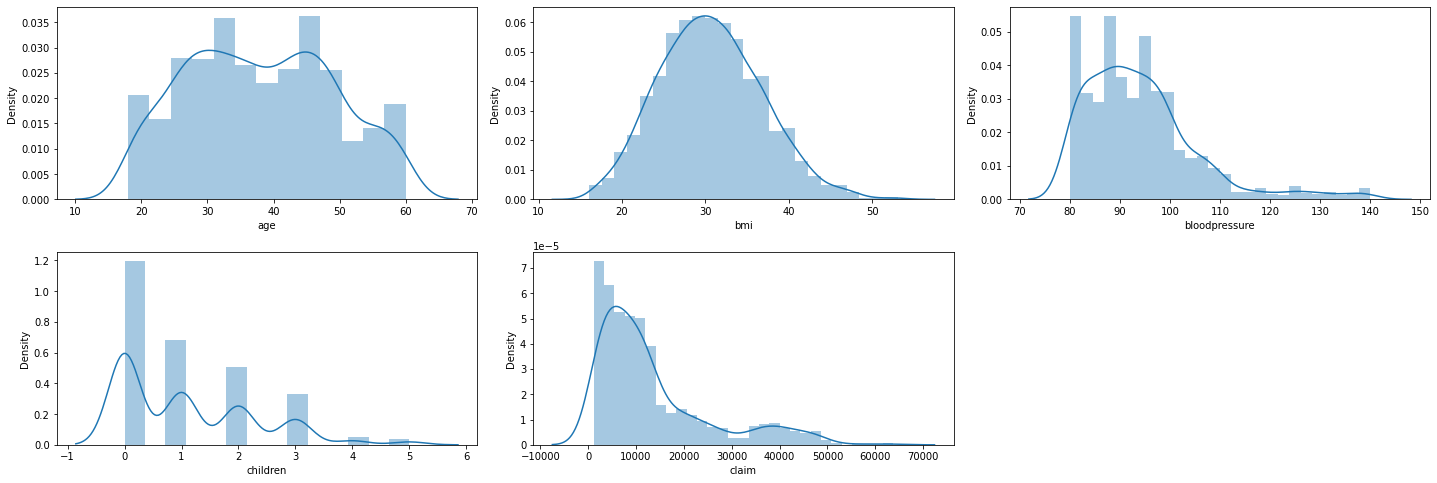

In [25]:
def dist_plot(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.distplot(data[col])
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

dist_plot(df)

<AxesSubplot:xlabel='claim', ylabel='age'>

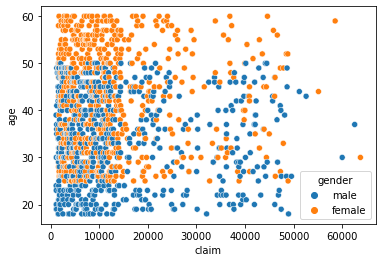

In [26]:
sns.scatterplot(data=df, x="claim", y="age", hue="gender")

<AxesSubplot:xlabel='bmi', ylabel='claim'>

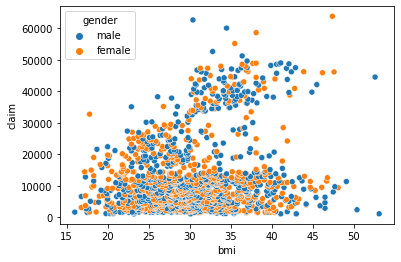

In [27]:
sns.scatterplot(data=df, x="bmi", y="claim", hue="gender")

**Analyze based on gender (male and female)**

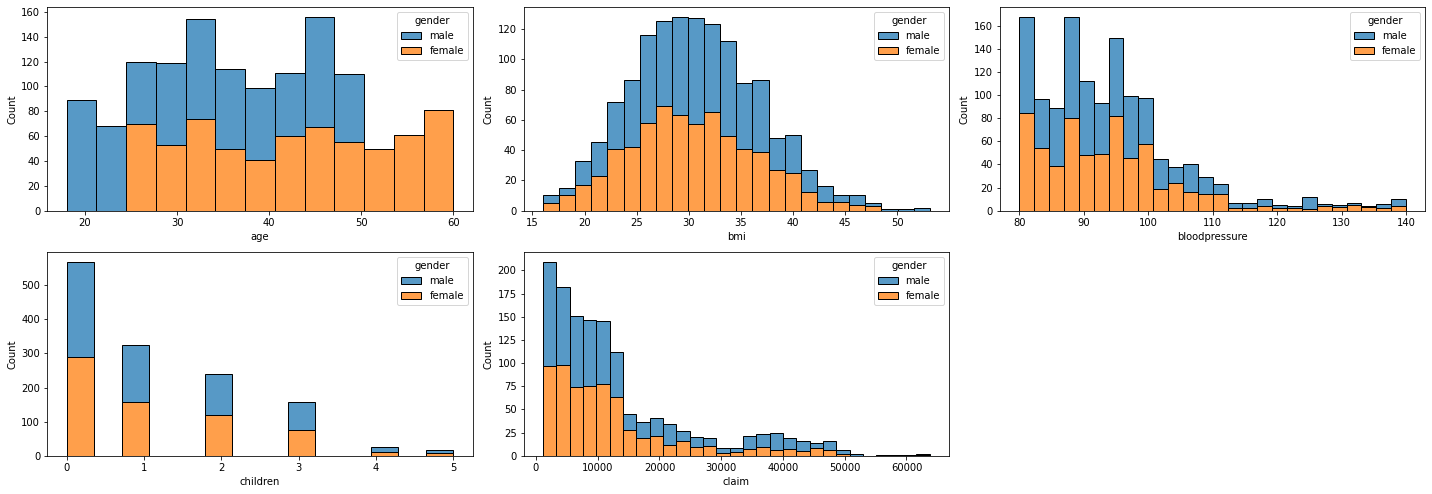

In [28]:
def numeric_based_on_gender(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    #sns.distplot(data[col])
    sns.histplot(data=df, x=col, hue="gender", multiple="stack")
    #plt.title(col, ' based on gender')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_gender(df)

**Conclusion based on gender:**
1. People who claimns in age 50 to 60 is dominate only by female and people who claims in age under to 25 is dominated only by male.
2. The highest amount of insurer who claims insurance is don't have children both male or female.
3. 

**Analyze based on wether diabetic suffer or not**

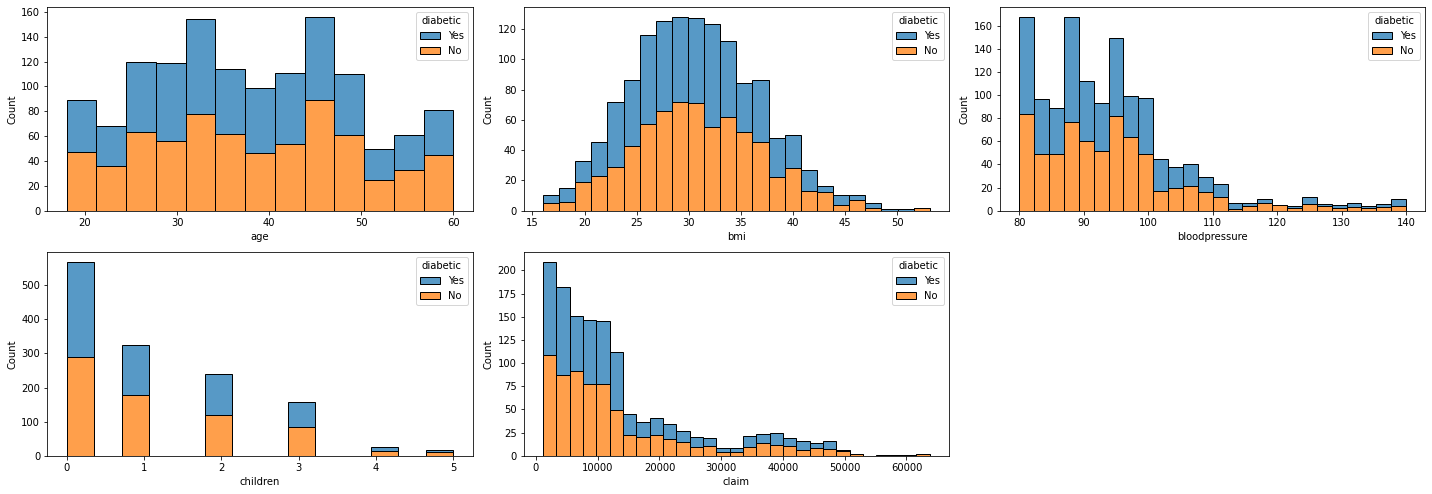

In [29]:
def numeric_based_on_diabetic(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    #sns.distplot(data[col])
    sns.histplot(data=df, x=col, hue="diabetic", multiple="stack")
    #plt.title(col, ' based on gender')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_diabetic(df)

**Conclusion based on diabetic suffer:** 
1. 

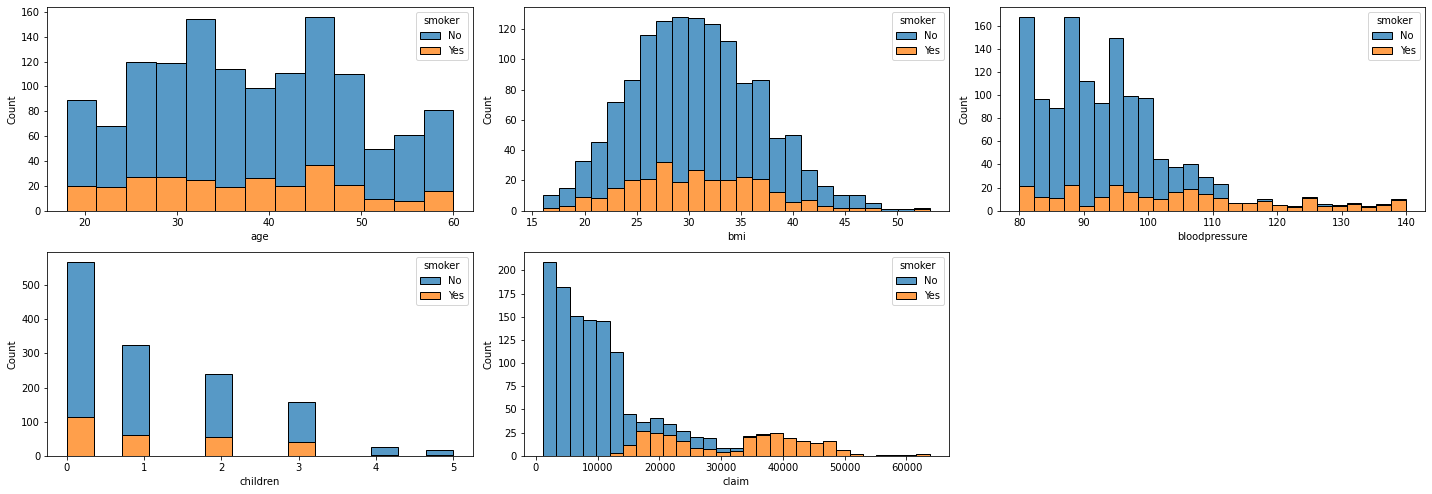

In [30]:
def numeric_based_on_smoker(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    #sns.distplot(data[col])
    sns.histplot(data=df, x=col, hue="smoker", multiple="stack")
    #plt.title(col, ' based on gender')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_smoker(df)

<AxesSubplot:xlabel='children', ylabel='Count'>

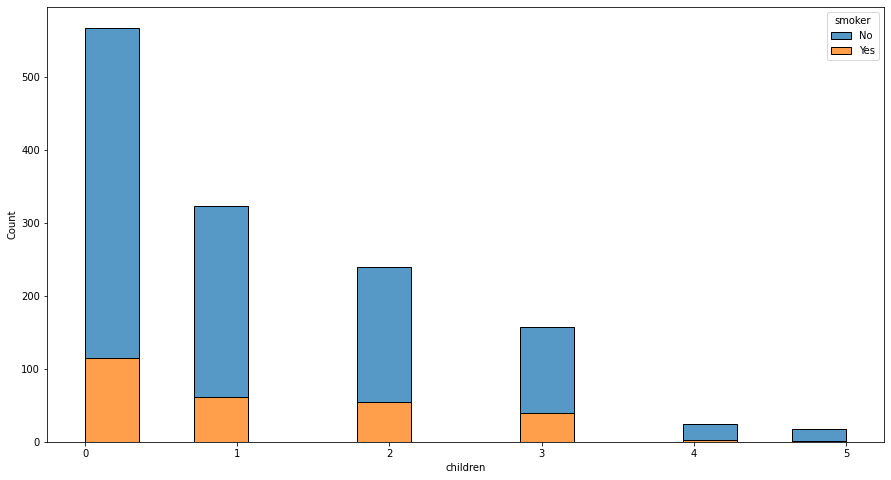

In [31]:
plt.figure(figsize = (15, 8))
sns.histplot(data=df, x="children", hue="smoker", multiple="stack")

<AxesSubplot:xlabel='claim', ylabel='Count'>

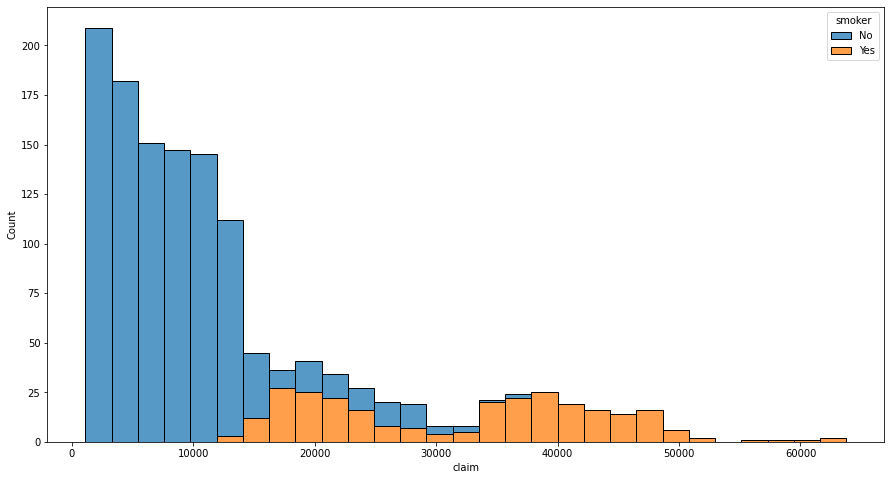

In [32]:
plt.figure(figsize = (15, 8))
sns.histplot(data=df, x="claim", hue="smoker", multiple="stack")

<AxesSubplot:xlabel='bloodpressure', ylabel='Count'>

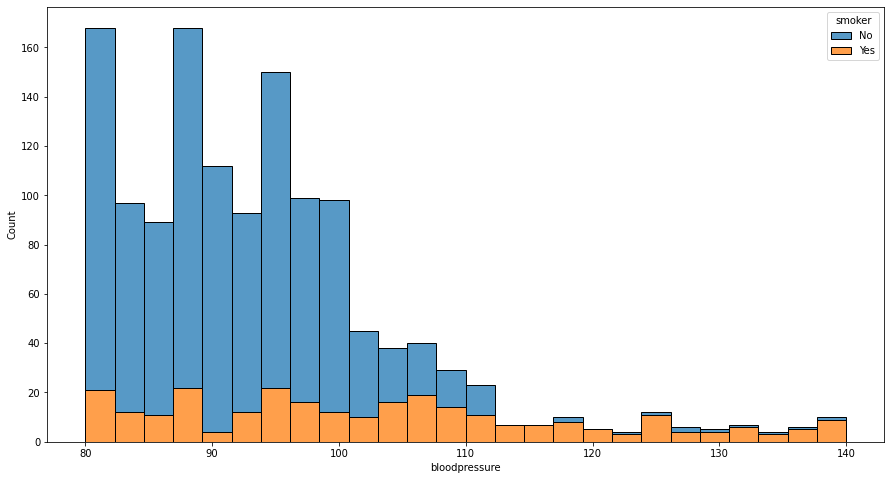

In [33]:
plt.figure(figsize = (15, 8))
sns.histplot(data=df, x="bloodpressure", hue="smoker", multiple="stack")

**Conclusion**
1. People who claims insurance with total amount between 0 to above 1000 is only dominated by smoker.
2. People who claims insurance with total amount between 4000 to above 6000 is only dominated by non smoker.
3. People who have blood pressure between 80 to 110 is dominated with non smoker.


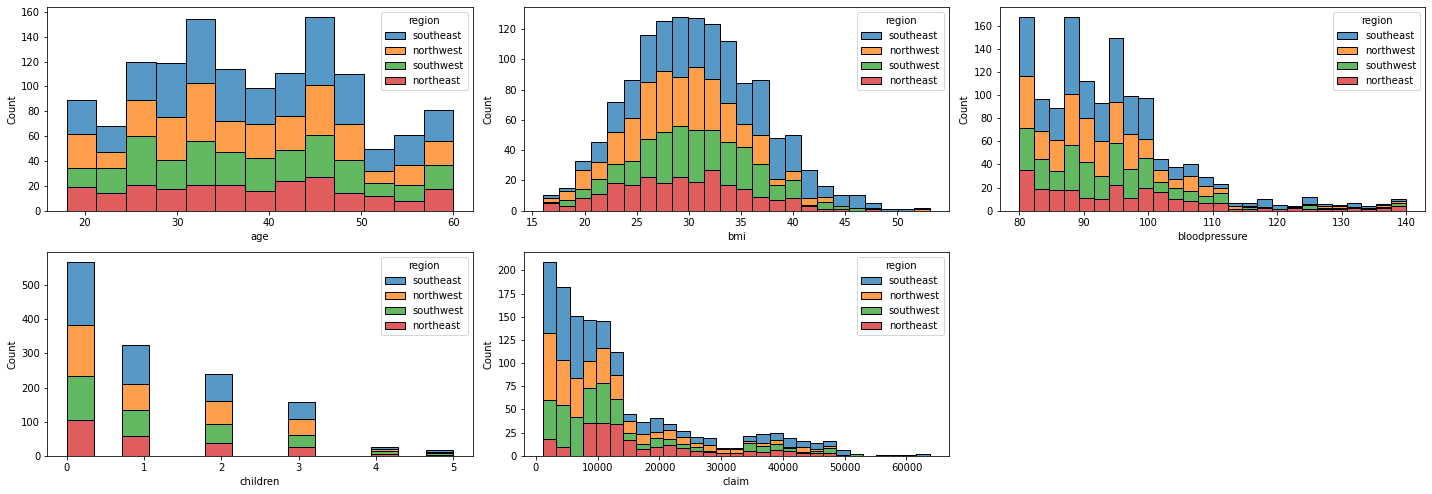

In [34]:
def numeric_based_on_region(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    #sns.distplot(data[col])
    sns.histplot(data=df, x=col, hue="region", multiple="stack")
    #plt.title(col, ' based on gender')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_region(df)

<AxesSubplot:>

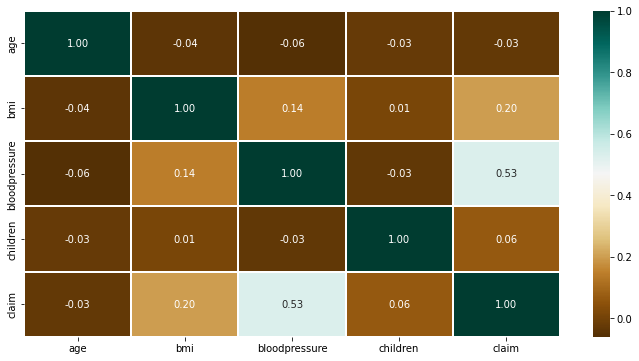

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


**Conclusion**
1. Blood presure has the highest positive correlation score of total claimn which is 0.53. Followed by BMI which is 0.2.
2. Age and children almost don't have correlation with total claim.

# Question
What kind of people who can claim insurance with high price?

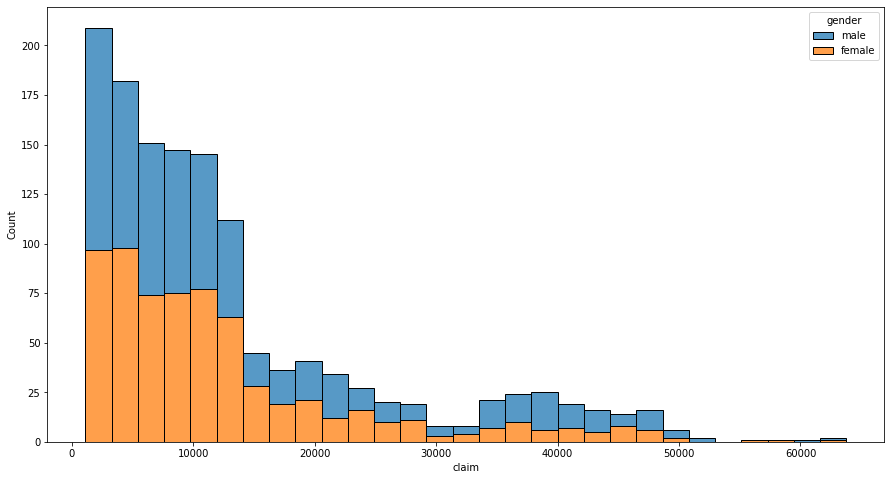

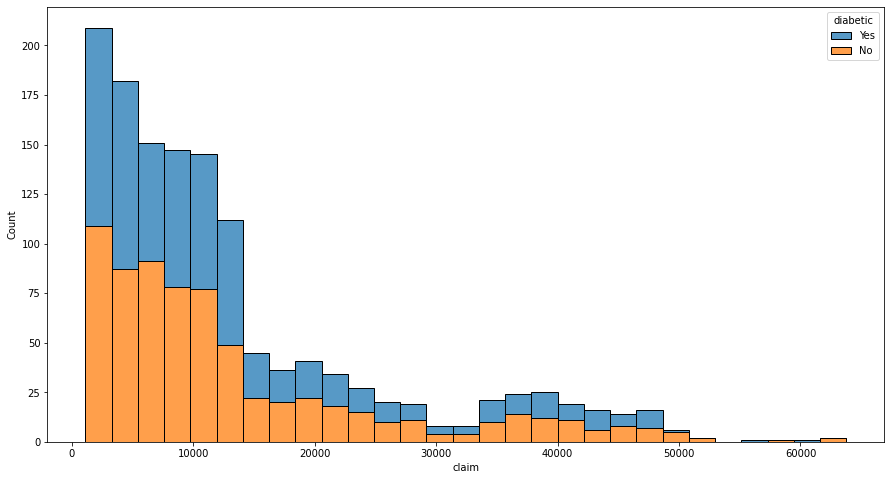

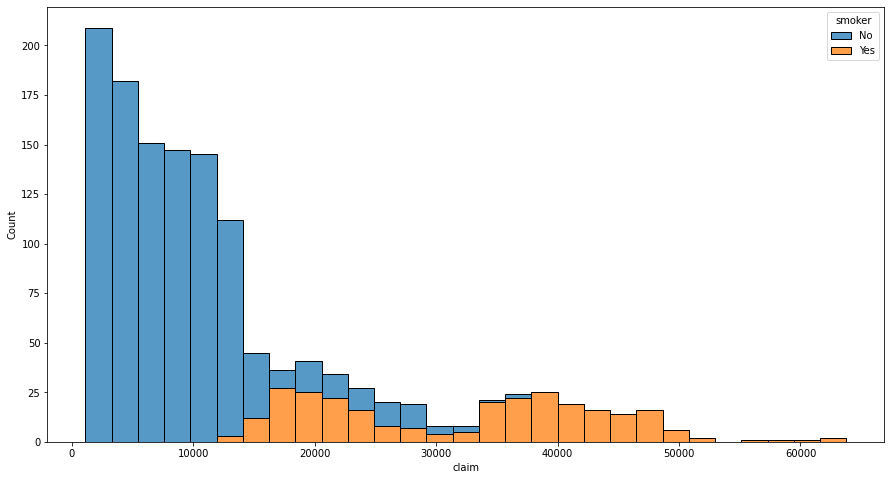

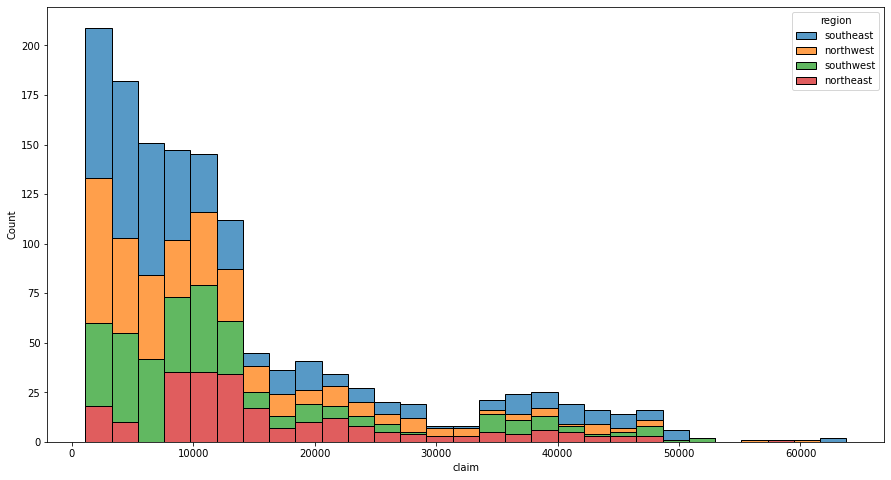

In [36]:
for i in categoric_columns:
    plt.figure(figsize = (15, 8))
    sns.histplot(data=df, x="claim", hue=i, multiple="stack")

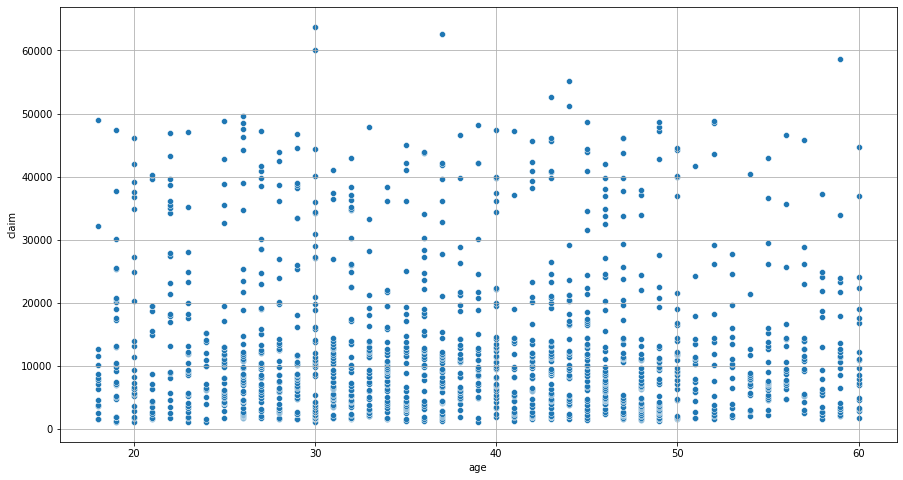

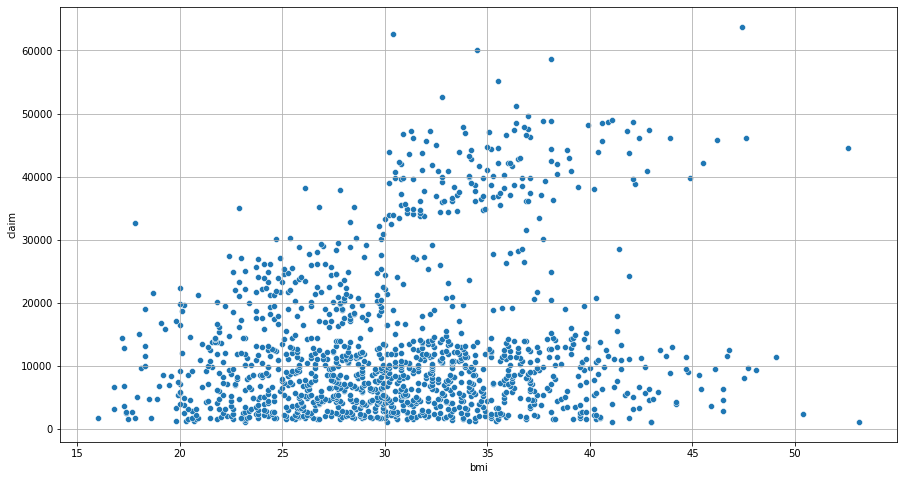

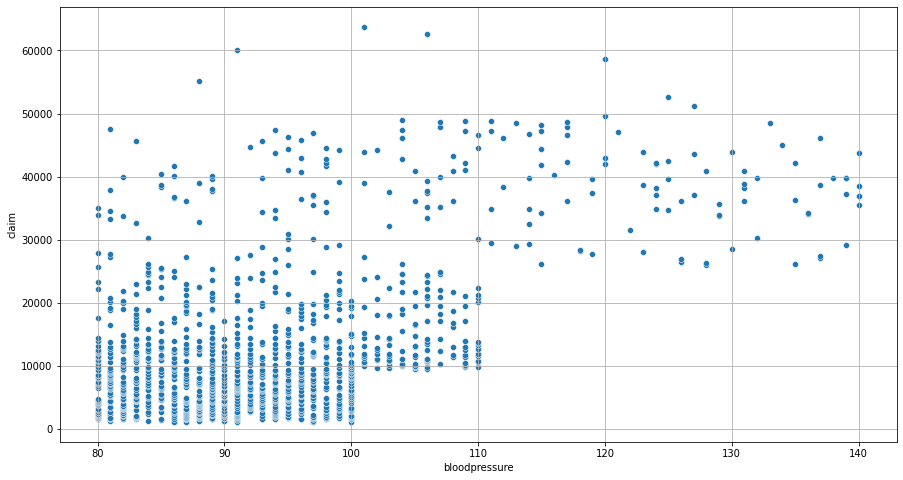

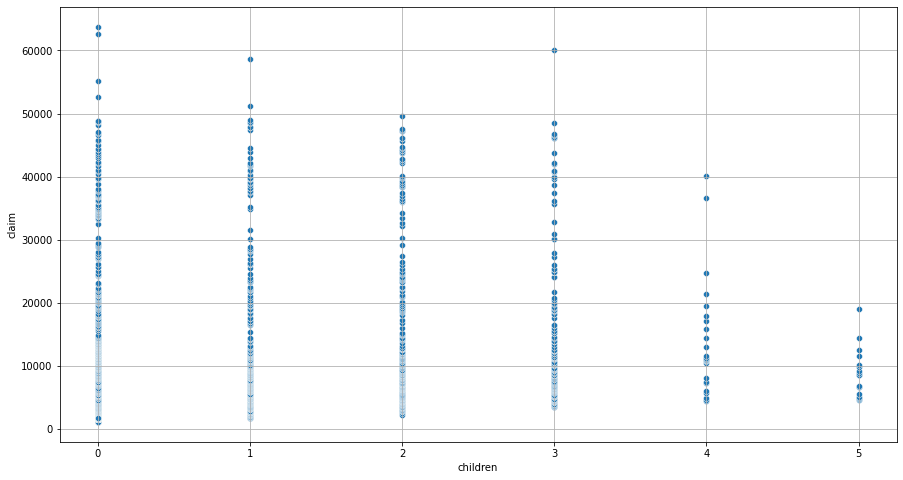

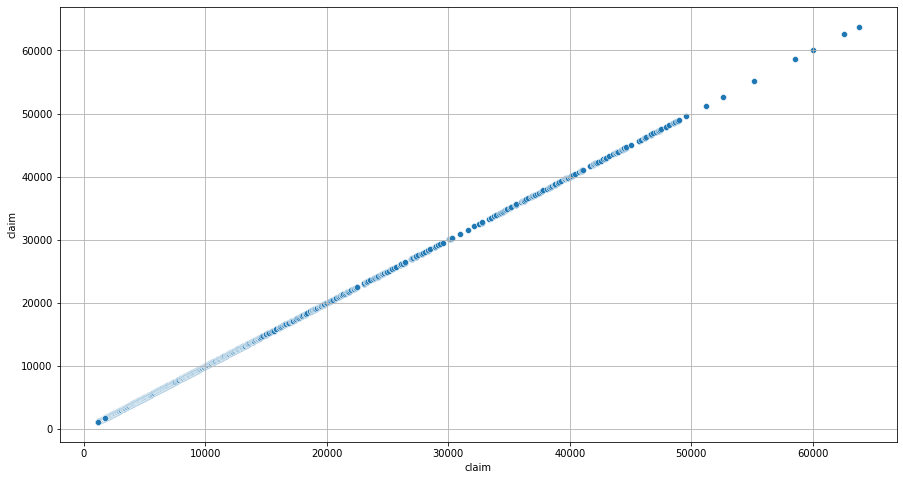

In [37]:
for col in numeric_columns:
    plt.figure(figsize = (15, 8))
    sns.scatterplot(data=df, x=col, y="claim")
    plt.grid()

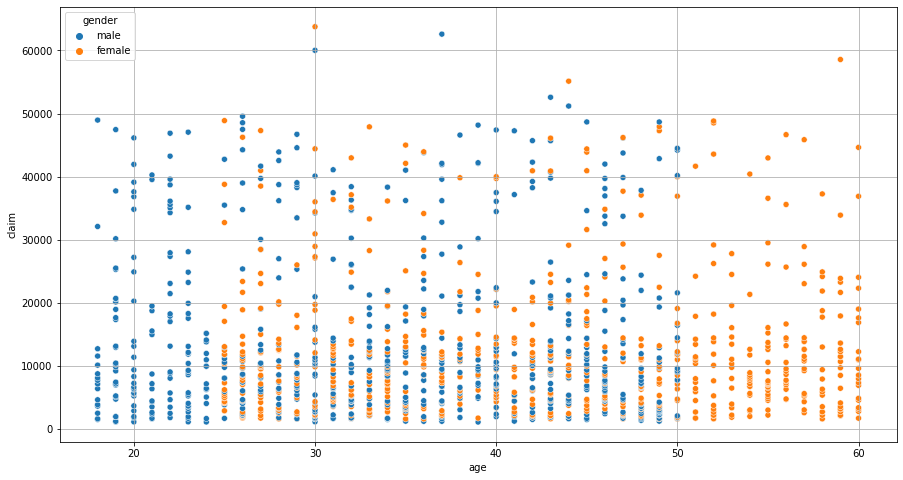

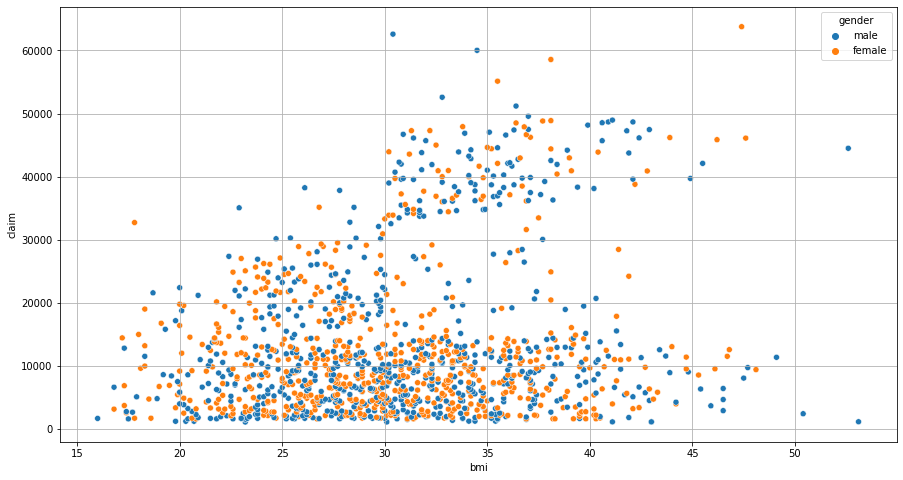

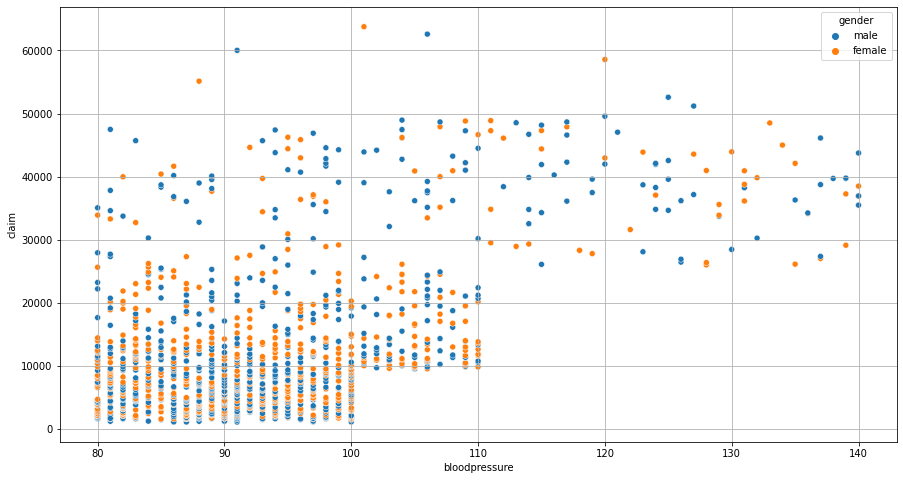

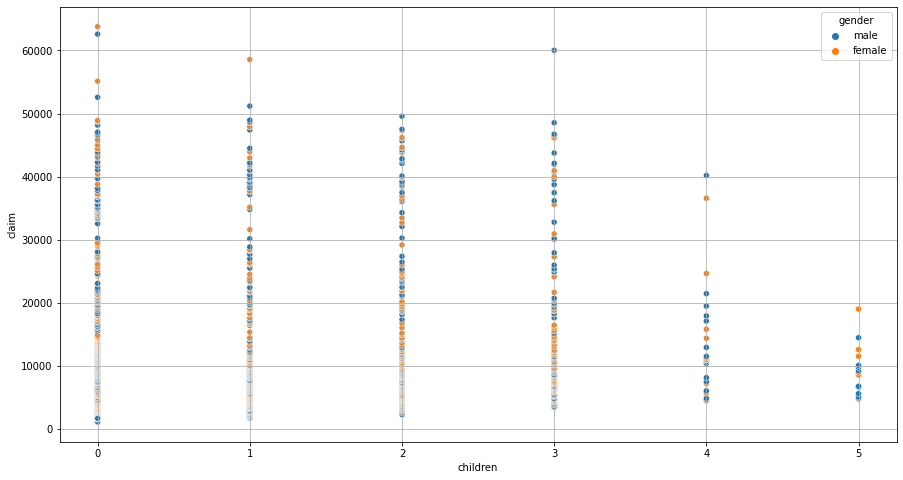

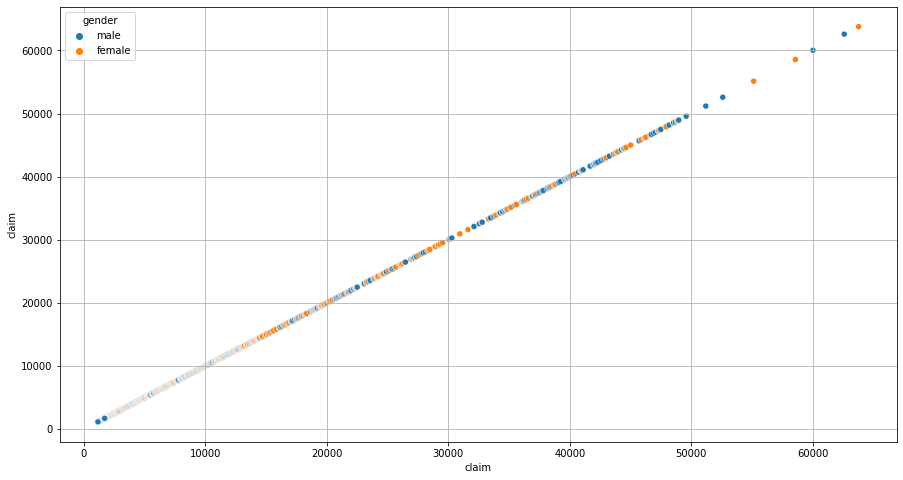

In [38]:
for col in numeric_columns:
    plt.figure(figsize = (15, 8))
    sns.scatterplot(data=df, x=col, y="claim", hue="gender")
    plt.grid()

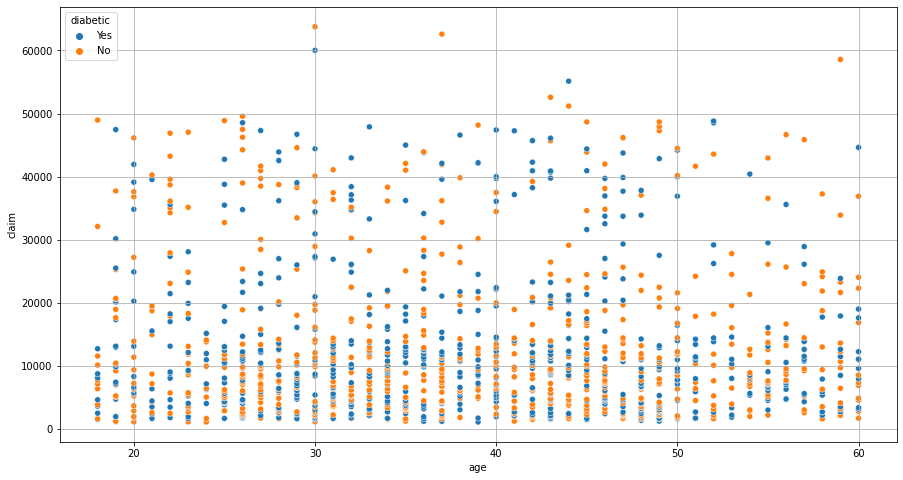

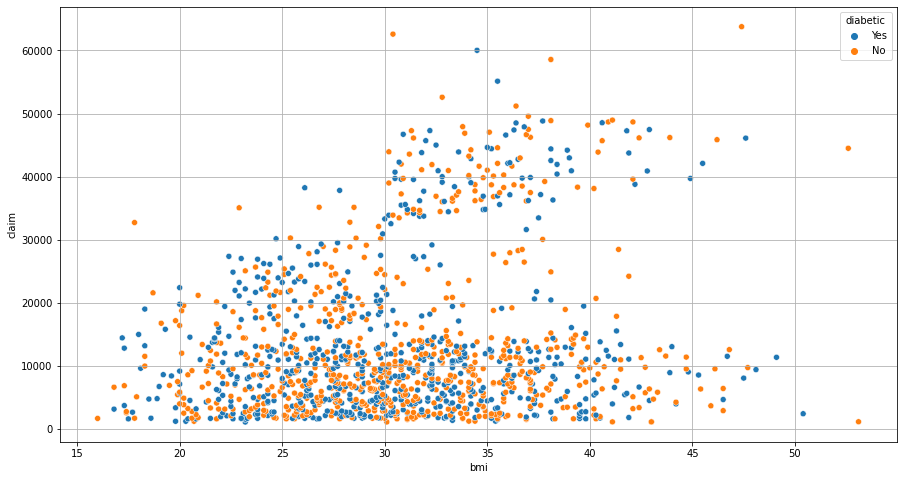

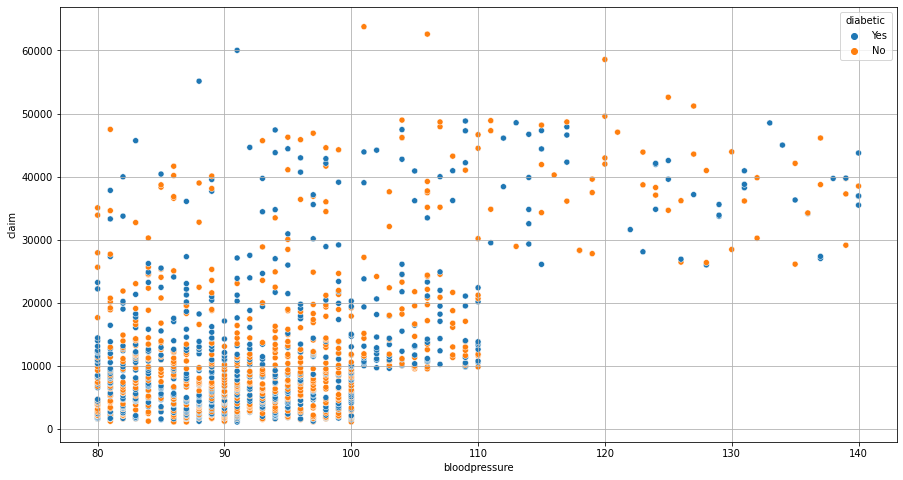

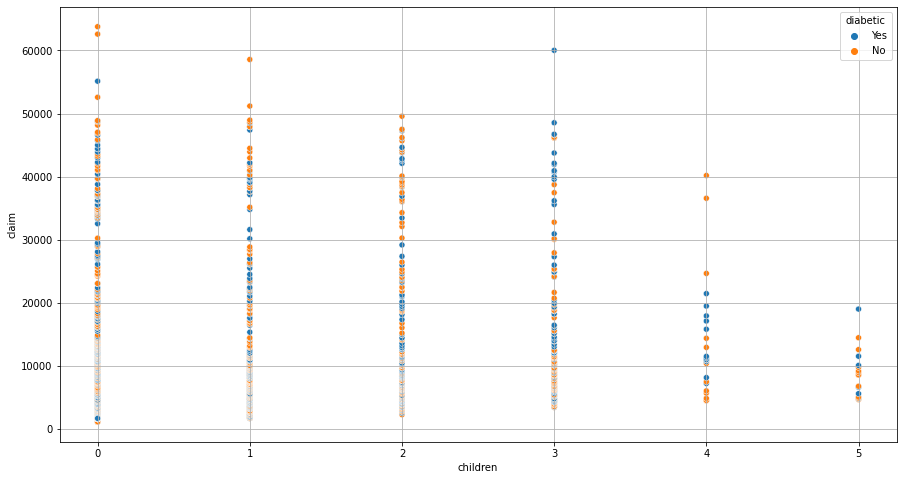

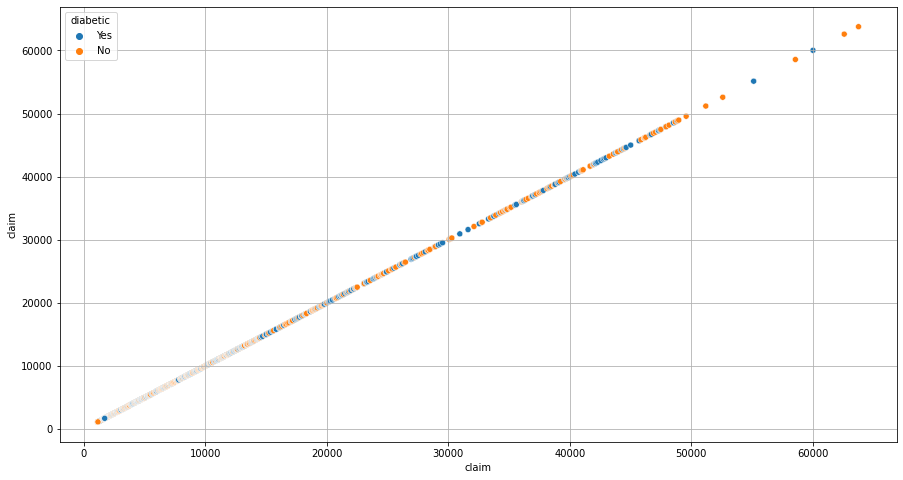

In [39]:
for col in numeric_columns:
    plt.figure(figsize = (15, 8))
    sns.scatterplot(data=df, x=col, y="claim", hue="diabetic")
    plt.grid()

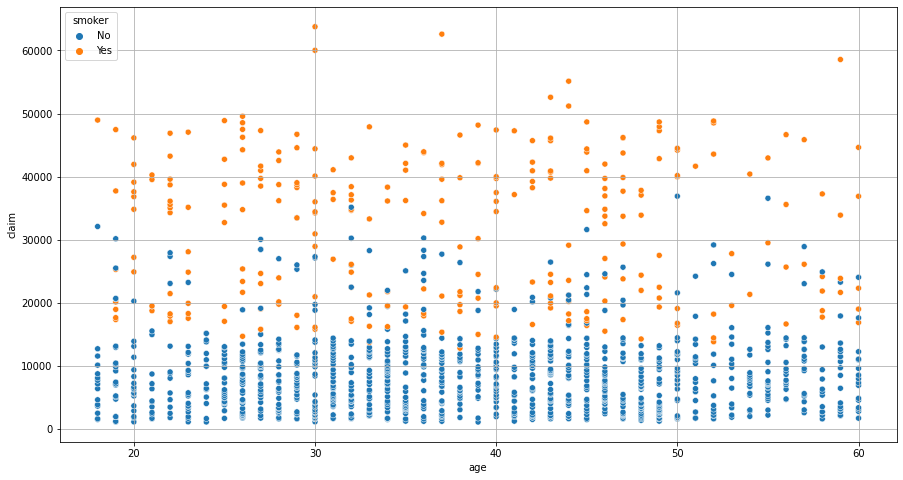

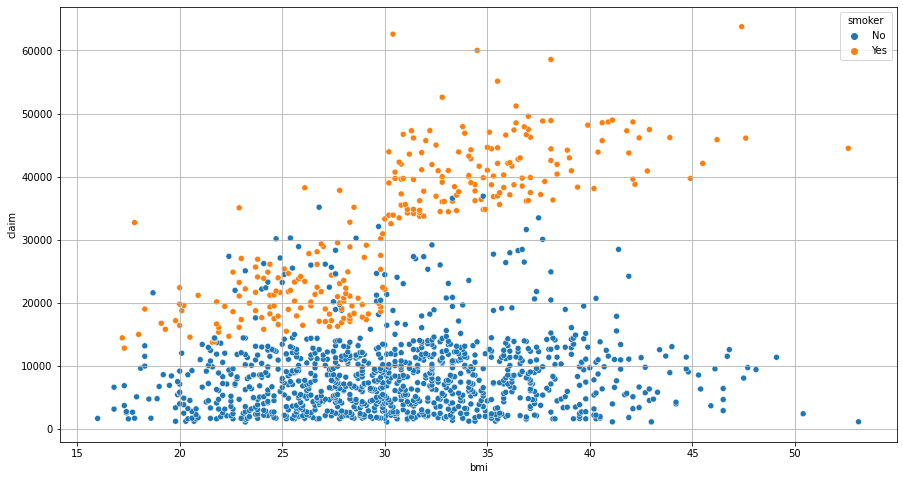

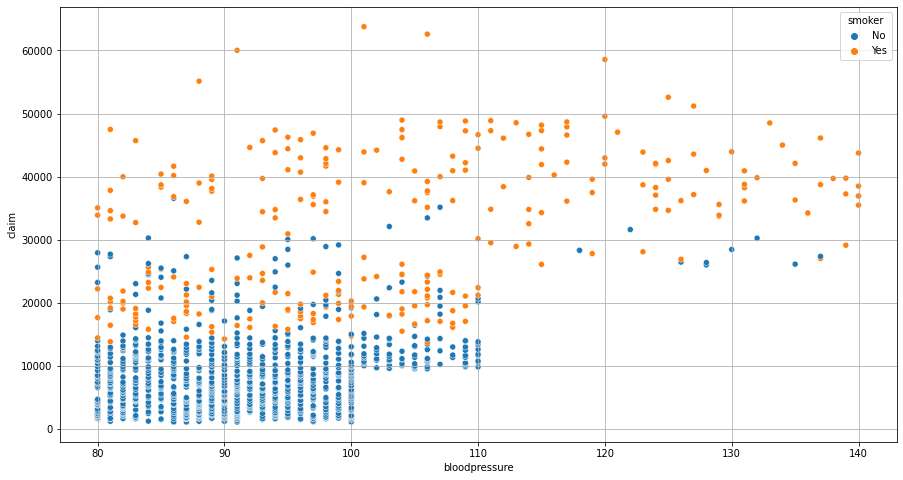

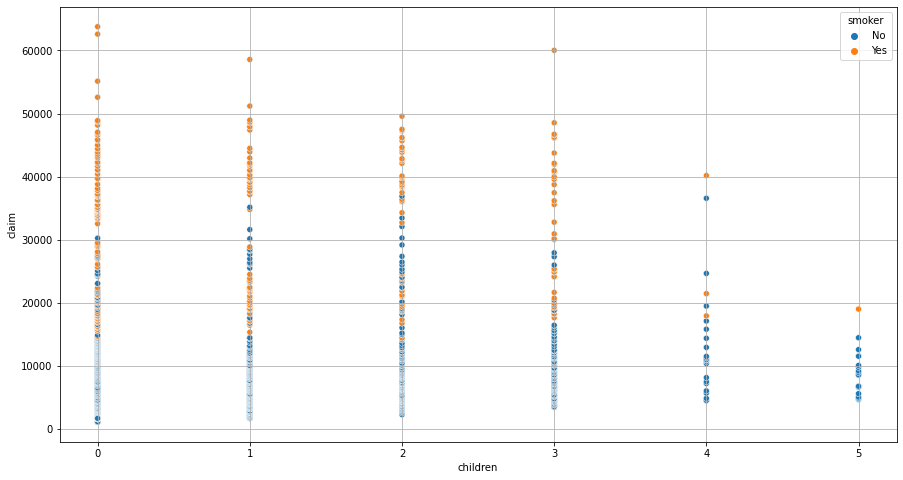

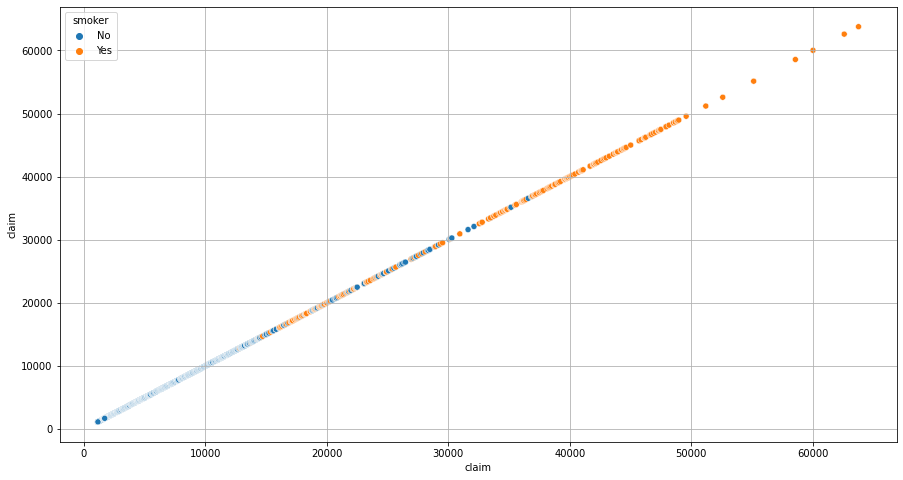

In [40]:
for col in numeric_columns:
    plt.figure(figsize = (15, 8))
    sns.scatterplot(data=df, x=col, y="claim", hue="smoker")
    plt.grid()

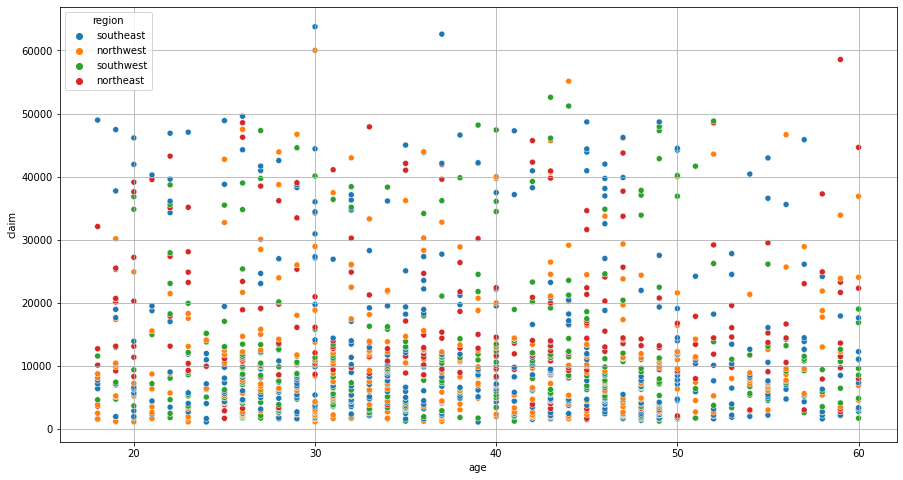

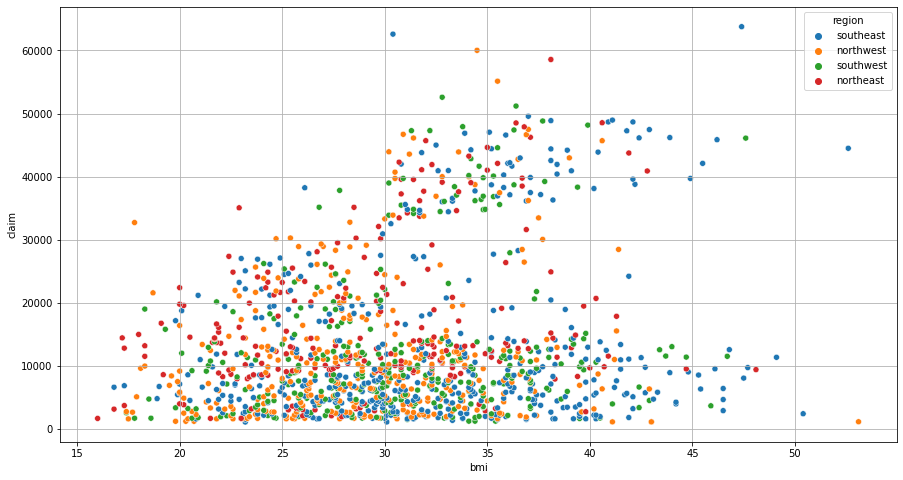

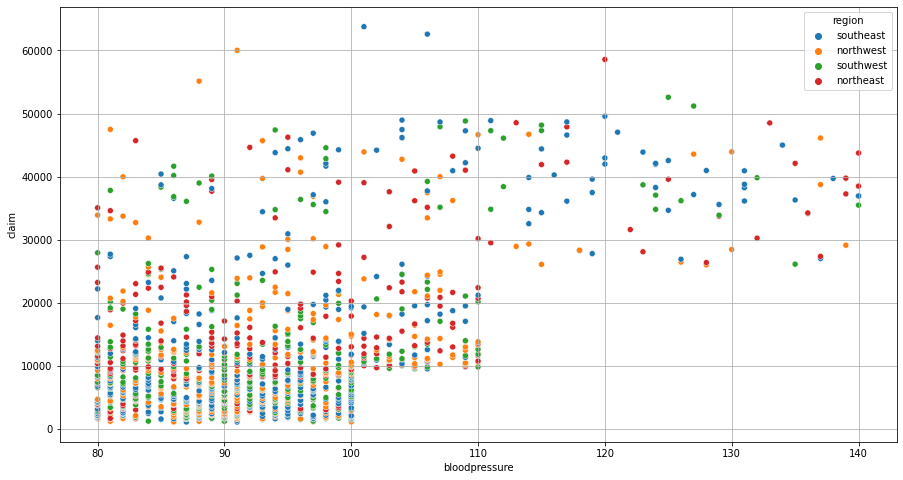

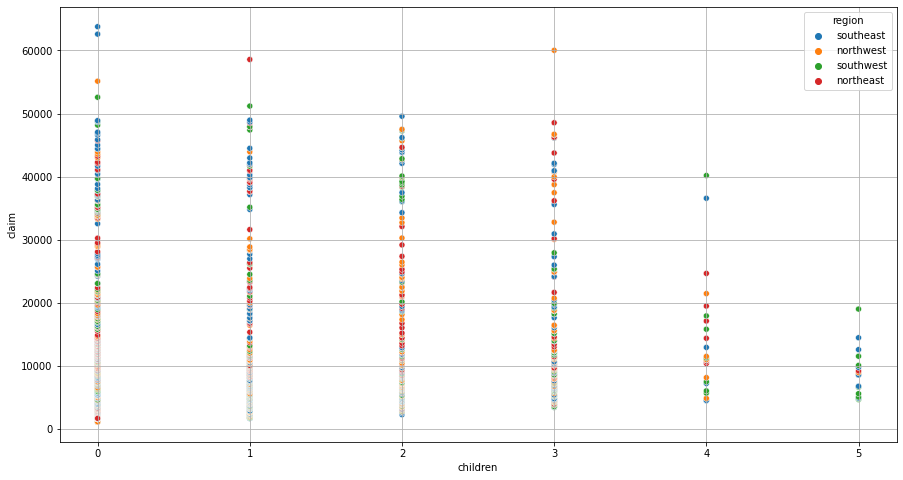

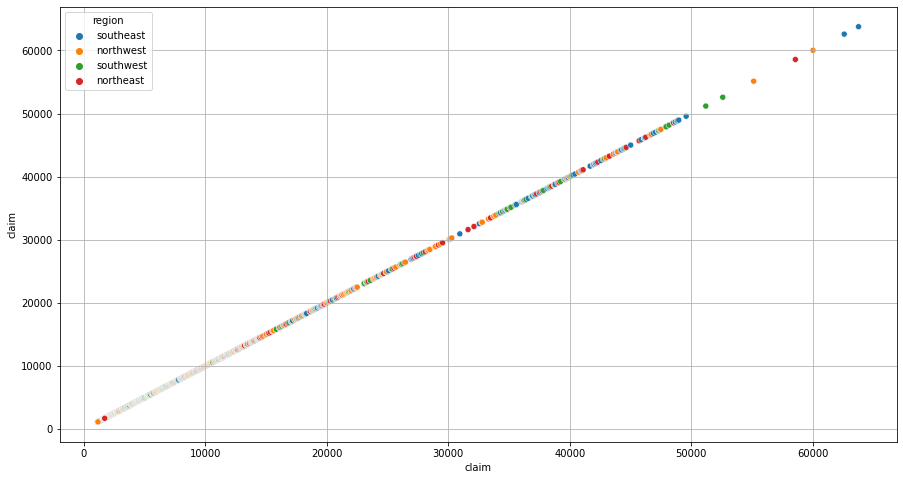

In [41]:
for col in numeric_columns:
    plt.figure(figsize = (15, 8))
    sns.scatterplot(data=df, x=col, y="claim", hue="region")
    plt.grid()

**Answer:**
1. People who can claimns insurance with the high price is male who don't diabetic suffer, not smoker and from Southeast
2. People who can claimns insurance with the high price (between 50.000 to 60.000 or above) has blood pressure between 90 to 130
3. People who either don't have children or have one, two, or three children can claim insurance with high price. 
4. People who claims insurance with the highest price is around 45-50 years old

In [42]:
#df[df.gender == 'male']['claim'].hist(bins=20, color='blue', alpha=0.5)
#df[df.gender == 'female']['claim'].hist(bins=20, color='yellow', alpha=0.5)
#plt.title('Claim based on gender')
#plt.show()

In [43]:
categoric_columns.columns

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')